**Import Dependencies**

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [27]:
#!pip install kaggle

In [28]:
# # mount goole drive code

# from google.colab import drive
# drive.mount('/content/drive')


In [29]:
kaggle_credentails = json.load(open("/content/drive/MyDrive/kaggle.json"))

In [30]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [31]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
plantvillage-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [32]:
!ls

 drive	'plantvillage dataset'	 plantvillage-dataset.zip   sample_data


In [33]:
#Unzip the downloaded dataset
with ZipFile('plantvillage-dataset.zip', 'r') as zip:
  zip.extractall()

In [34]:
print(os.listdir("plantvillage dataset"))


['grayscale', 'segmented', 'color']


In [35]:
#walk through directory and list number of files
for dirpath, dirnames, filenames in os.walk("plantvillage dataset"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in 'plantvillage dataset'.
There are 38 directories and 0 images in 'plantvillage dataset/grayscale'.
There are 0 directories and 373 images in 'plantvillage dataset/grayscale/Tomato___Tomato_mosaic_virus'.
There are 0 directories and 1052 images in 'plantvillage dataset/grayscale/Cherry_(including_sour)___Powdery_mildew'.
There are 0 directories and 1076 images in 'plantvillage dataset/grayscale/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'.
There are 0 directories and 621 images in 'plantvillage dataset/grayscale/Apple___Black_rot'.
There are 0 directories and 1909 images in 'plantvillage dataset/grayscale/Tomato___Late_blight'.
There are 0 directories and 5090 images in 'plantvillage dataset/grayscale/Soybean___healthy'.
There are 0 directories and 1835 images in 'plantvillage dataset/grayscale/Squash___Powdery_mildew'.
There are 0 directories and 1000 images in 'plantvillage dataset/grayscale/Tomato___Early_blight'.
There are 0 directories and 371

**Data Preprocessing**

In [36]:
basedir = "plantvillage dataset/color"

(256, 256, 3)


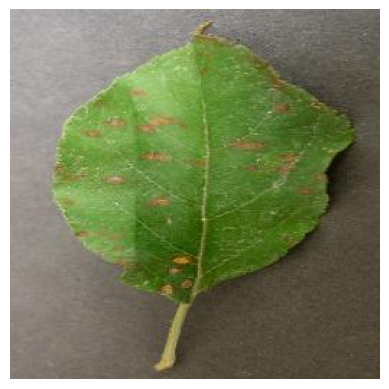

In [37]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [38]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'
img = mpimg.imread(image_path)
print(img)

[[[179 175 176]
  [181 177 178]
  [184 180 181]
  ...
  [115 112 105]
  [108 105  98]
  [101  98  91]]

 [[176 172 173]
  [177 173 174]
  [178 174 175]
  ...
  [113 110 103]
  [111 108 101]
  [109 106  99]]

 [[180 176 177]
  [180 176 177]
  [180 176 177]
  ...
  [108 105  98]
  [111 108 101]
  [114 111 104]]

 ...

 [[137 128 119]
  [131 122 113]
  [125 116 107]
  ...
  [ 74  65  48]
  [ 74  65  48]
  [ 73  64  47]]

 [[136 127 118]
  [132 123 114]
  [128 119 110]
  ...
  [ 77  69  50]
  [ 75  67  48]
  [ 75  67  48]]

 [[133 124 115]
  [133 124 115]
  [132 123 114]
  ...
  [ 81  73  54]
  [ 80  72  53]
  [ 79  71  52]]]


In [39]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (256, 256, 3)


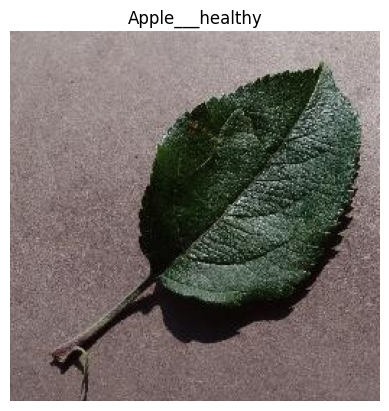

In [40]:
img = view_random_image(target_dir="plantvillage dataset/color/",
                        target_class="Apple___healthy")

In [41]:
#Declare constants
BATCH_SIZE = 32
IMAGE_SIZE = 224
CHANNELS = 3
EPOCHS = 6

**Train Test Split**

In [42]:
# Image Data Generators
data_gen = ImageDataGenerator(
                              rescale=1./255,
                              horizontal_flip=True,
                              zoom_range=0.2,
                              rotation_range=20,
                              #width_shift_range=0.2,
                              #height_shift_range=0.2,
                              shear_range=0.2,
                              validation_split=0.2  # Use 20% of data for validation
)

In [43]:
# Train Generator
train_generator = data_gen.flow_from_directory('plantvillage dataset/color',
                                               target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                               batch_size=BATCH_SIZE,
                                               subset='training',
                                               class_mode='categorical'
                                               )

Found 43456 images belonging to 38 classes.


In [44]:
validation_generator = data_gen.flow_from_directory('plantvillage dataset/color',
                                               target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                               batch_size=BATCH_SIZE,
                                               subset='validation',
                                               class_mode='categorical'
                                              )

Found 10849 images belonging to 38 classes.


**Building the CNN**
**Initialising the CNN**

In [45]:
cnn = tf.keras.models.Sequential()

**Convolution**

In [46]:
cnn.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)))

**Pooling**

In [47]:
cnn.add(layers.MaxPool2D(pool_size = 2, strides = 2 ))

**Adding more Convolution layer

In [48]:
cnn.add(layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(layers.MaxPool2D(pool_size = 2, strides = 2 ))

cnn.add(layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(layers.MaxPool2D(pool_size = 2, strides = 2 ))

**Flattening**

In [49]:
cnn.add(layers.Flatten())

**Full Connection**

In [50]:
cnn.add(layers.Dense(units = 256, activation = 'relu'))

**Output Layer**

In [51]:
cnn.add(layers.Dense(units = train_generator.num_classes, activation = 'softmax' ))

In [52]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

**Training the CNN**
**Compiling the CNN**

In [53]:
cnn.compile(
            optimizer = 'adam',
            loss = 'categorical_crossentropy',
            metrics = ['accuracy']
            )


**Fit data**

In [54]:
history = cnn.fit(train_generator,
        validation_data = validation_generator,
        batch_size = BATCH_SIZE,
        epochs = EPOCHS,
        verbose = 1,  # Display progress bar
        callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)],  # Stop training if val_loss doesn't improve for 3 epochs

        )

Epoch 1/6
1358/1358 [==============================] - 686s 501ms/step - loss: 1.1587 - accuracy: 0.6651 - val_loss: 0.6825 - val_accuracy: 0.7858
Epoch 2/6
1358/1358 [==============================] - 654s 482ms/step - loss: 0.4827 - accuracy: 0.8467 - val_loss: 0.3647 - val_accuracy: 0.8804
Epoch 3/6
1358/1358 [==============================] - 654s 481ms/step - loss: 0.3450 - accuracy: 0.8891 - val_loss: 0.3143 - val_accuracy: 0.8999
Epoch 4/6
1358/1358 [==============================] - 654s 482ms/step - loss: 0.2821 - accuracy: 0.9089 - val_loss: 0.2710 - val_accuracy: 0.9097
Epoch 5/6
1358/1358 [==============================] - 659s 486ms/step - loss: 0.2336 - accuracy: 0.9237 - val_loss: 0.2311 - val_accuracy: 0.9265
Epoch 6/6
1358/1358 [==============================] - 650s 479ms/step - loss: 0.2087 - accuracy: 0.9331 - val_loss: 0.2496 - val_accuracy: 0.9265


**Model Evaluation**

In [55]:
print('Evaluating the model')

# Evaluate the model
val_loss, val_accuracy = cnn.evaluate(validation_generator, steps=validation_generator.samples // BATCH_SIZE)

# Print the results
print('Validation Loss:', val_loss)
print('Validation Accuracy:', val_accuracy)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')


Evaluating the model
339/339 [==============================] - 125s 370ms/step - loss: 0.2490 - accuracy: 0.9234
Validation Loss: 0.24904713034629822
Validation Accuracy: 0.9233959913253784
Validation Accuracy: 92.34%


**Plot the traning and validation accuracy**

In [56]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

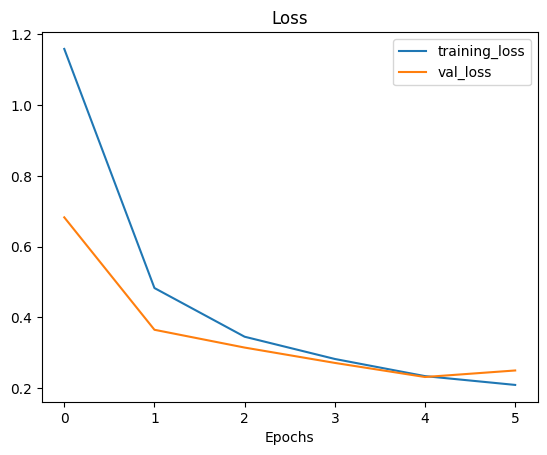

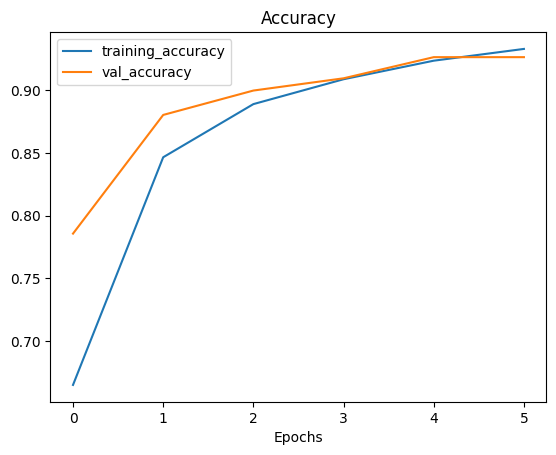

In [57]:
plot_loss_curves(history)

**Build a Predictive System**

In [58]:
#Function to load and Preprocess the Image
def load_and_prep_image(filename, img_shape=(224,224)):
  #load the image
  img = Image.open(filename)
  #resize the image
  img = img.resize(img_shape)
  #convert the image to a numpy array
  img_ary = np.array(img)
  #add an extra dimension to the array
  img_ary = np.expand_dims(img_ary, axis=0)
  #scale the image values to [0, 1]
  img_ary = img_ary.astype('float32')/255.0
  return img_ary


In [59]:
#Function to predict the class of an image
def predict_image(model, filename, class_names):
  preprocessed_img = load_and_prep_image(filename)
  pred_img = model.predict(preprocessed_img)
  predicted_class_index = np.argmax(pred_img, axis = 1)[0]
  predicted_class_name = class_names[predicted_class_index]
  return predicted_class_name


In [60]:
class_names = {v: k for k, v in train_generator.class_indices.items()}
#class_names = list(train_generator.class_indices.keys())
class_names

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [61]:
#saving the class names as json file
json.dump(class_names, open('/content/drive/MyDrive/PlantdiseasePredictionModel/class_names.json', 'w'))

In [62]:
# Example Usage
#image_path = '/content/drive/MyDrive/PlantVillage/test_images/test_apple_black_rot.JPG'
image_path = '/content/drive/MyDrive/test_images/test_apple_black_rot.JPG'
#image_path = '/content/test_potato_early_blight.jpg'
predicted_class_name = predict_image(cnn, image_path, class_names)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 [==============================] - 0s 123ms/step
Predicted Class Name: Apple___Black_rot


In [63]:
#cnn.save('/content/drive/MyDrive/PlantVillage/plant_disease_prediction_model.h5')
cnn.save('/content/drive/MyDrive/PlantdiseasePredictionModel/plant_disease_prediction_model.h5')
cnn.save('plant_disease_prediction_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [64]:
import tensorflow as tf

# Load the saved model
model = tf.keras.models.load_model('plant_disease_prediction_model.h5')

image_path = '/content/drive/MyDrive/test_images/test_blueberry_healthy.jpg'
predicted_class_name = predict_image(model, image_path, class_names)

# Output the result
print("Predicted Class Name:", predicted_class_name)

image_path = '/content/drive/MyDrive/test_images/test_apple_black_rot.JPG'
predicted_class_name = predict_image(model, image_path, class_names)

# Output the result
print("Predicted Class Name:", predicted_class_name)




1/1 [==============================] - 0s 67ms/step
Predicted Class Name: Blueberry___healthy
1/1 [==============================] - 0s 17ms/step
Predicted Class Name: Apple___Black_rot
